In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scienceplots
plt.style.use(style = ['fast', 'grid'])
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'bright',
 'cjk-jp-font',
 'cjk-kr-font',
 'cjk-sc-font',
 'cjk-tc-font',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'grid',
 'high-contrast',
 'high-vis',
 'ieee',
 'latex-sans',
 'light',
 'muted',
 'nature',
 'no-latex',
 'notebook',
 'pgf',
 'retro',
 'russian-font',
 'sans',
 'scatter',
 'science',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'std-colors',
 'tableau-colorblind10',
 'turkish-font',
 'vibrant']

In [79]:
data = pd.read_excel("Lab3.xlsx", sheet_name = 'data')
data

,Równoważna wartość stałej ekspozycyjnej,Odległość od źródła,Aktywność,Odległość-719,Moc-719,Odległość-642,Moc-642,Odległość-Model19,Moc-Model19,Moc od Boga
0,0.0214,1.0,0.037,30,191.90,30,138.2000,50.0,31.0,101.123883
1,NaN,NaN,NaN,40,89.88,40,73.1100,60.0,22.0,56.882184
2,NaN,NaN,NaN,50,62.88,50,45.5000,70.0,17.0,36.404598
3,NaN,NaN,NaN,60,44.00,60,30.6700,80.0,13.0,25.280971
4,NaN,NaN,NaN,70,30.82,70,23.3100,90.0,10.0,18.573774
5,NaN,NaN,NaN,80,22.84,80,17.7975,100.0,9.0,14.220546
6,NaN,NaN,NaN,90,18.16,90,14.6900,110.0,7.0,11.235987
7,NaN,NaN,NaN,100,13.28,100,10.7200,120.0,6.0,9.101149
8,NaN,NaN,NaN,110,11.78,110,9.6850,130.0,5.0,7.521611
9,NaN,NaN,NaN,120,9.78,120,8.5100,140.0,4.6,6.320243


In [80]:
GAMMA_r = data['Równoważna wartość stałej ekspozycyjnej'][0]
unitLength = data['Odległość od źródła '][0]
activity = data['Aktywność'][0]

distance = data['Odległość-719']
distance = distance/100

distanceM19 = data['Odległość-Model19']
distanceM19 = distanceM19/100

effectiveDose719 = data['Moc-719']
effectiveDose642 = data['Moc-642']
effectiveDose19 = data['Moc-Model19']
idealEffectiveDose = data['Moc od Boga']
GAMMA_r, activity

(0.0214, 0.037)

In [97]:
from scipy.optimize import curve_fit

def energyFun(l, A):
    return A*(l**-2)

popt719, pcov719 = curve_fit(energyFun, xdata = distance, ydata = effectiveDose719)
popt642, pcov642 = curve_fit(energyFun, xdata = distance, ydata = effectiveDose642)
popt19, pcov19 = curve_fit(energyFun, xdata = distanceM19[0:11], ydata = effectiveDose19[0:11])
popt642, np.sqrt(pcov642), popt719, np.sqrt(pcov719), popt19, np.sqrt(pcov19)

(array([12.09713033]),
 array([[0.1346567]]),
 array([16.36768993]),
 array([[0.35664109]]),
 array([7.99827767]),
 array([[0.10243517]]))

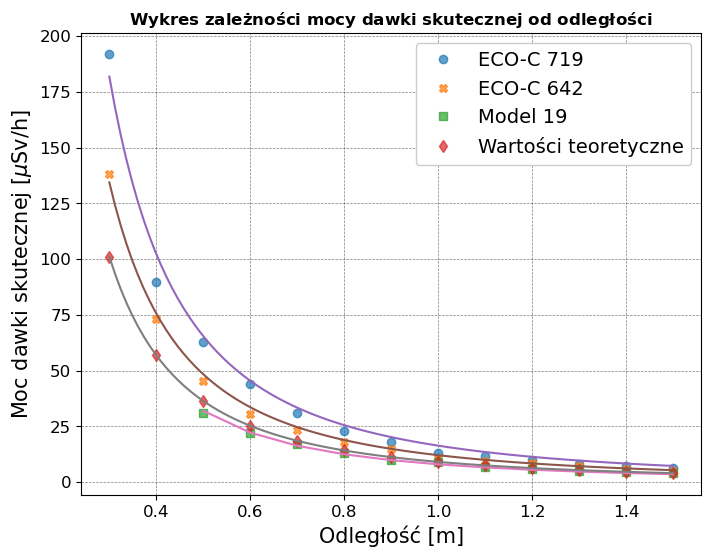

In [82]:
dist719642 = np.linspace(0.3, 1.5, 100)

plt.figure(1, (8, 6))
plt.plot(distance, effectiveDose719, marker = 'o', alpha = 0.7, linestyle = '', label = 'ECO-C 719')
plt.plot(distance, effectiveDose642, marker='X', alpha = 0.7, linestyle = '', label = 'ECO-C 642')
plt.plot(distanceM19, effectiveDose19, marker='s', alpha = 0.7, linestyle = '', label = 'Model 19')
plt.plot(distance, idealEffectiveDose, marker = 'd', alpha = 0.7, linestyle = '', label = 'Wartości teoretyczne')

plt.plot(dist719642, popt719/dist719642**2, linestyle = '-', label = 'ECO-C 719 curve')
plt.plot(dist719642, popt642/dist719642**2, linestyle = '-', label = 'ECO-C 642 curve')
plt.plot(distanceM19, energyFun(distanceM19, popt19), linestyle = '-', label = 'ECO-C 19 curve')
plt.plot(dist719642, (GAMMA_r*activity*10**3)/(0.087*dist719642**2), linestyle = '-', label = 'Ideal curve')

plt.tick_params(axis='both', labelsize = 12)
plt.xlabel('Odległość [m]', fontsize = 15) 
plt.ylabel(r'Moc dawki skutecznej [$\mu$Sv/h]', fontsize = 15)
plt.title(r'$\bf{Wykres ~zależności ~mocy ~dawki ~skutecznej ~od ~odległości}$')
plt.grid(True)
plt.legend(['ECO-C 719', 'ECO-C 642', 'Model 19', 'Wartości teoretyczne'], fontsize = 14)


In [83]:
from scipy.stats import linregress

fit19 = linregress(idealEffectiveDose[0:10], effectiveDose19[0:10])
fit719 = linregress(idealEffectiveDose, effectiveDose719)
fit642 = linregress(idealEffectiveDose, effectiveDose642)
idealFit = linregress(idealEffectiveDose, idealEffectiveDose)
fits = [fit19, fit719, fit642]
idealityFactor = []

for i, fit in enumerate(fits):
    idealityFactor.append(idealFit.slope/fit.slope)
    print(f"Slope {i+1}: {fit.slope}\nIntercept {i+1}: {fit.intercept}\nIdeality factor {i+1}: {idealityFactor[i]}")


Slope 1: 0.2822910003438461
Intercept 1: 4.367706586322345
Ideality factor 1: 3.542443785958265
Slope 2: 1.856458936788507
Intercept 2: -3.154533467677517
Ideality factor 2: 0.5386599079481406
Slope 3: 1.3528428401326746
Intercept 3: -1.2857396386613722
Ideality factor 3: 0.7391841611860318


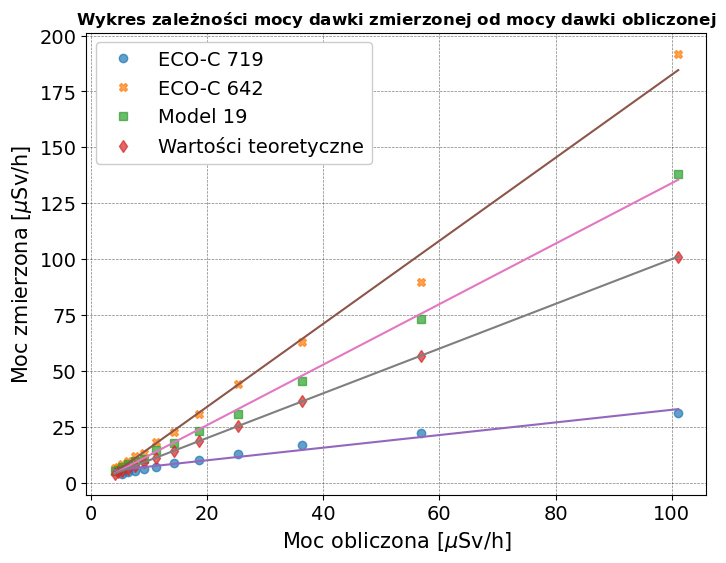

In [99]:
plt.figure(1, (8, 6))
plt.plot(idealEffectiveDose, effectiveDose19, marker = 'o', alpha = 0.7, linestyle = '', label = 'ECO-C 719')
plt.plot(idealEffectiveDose, effectiveDose719, marker = 'X', alpha = 0.7, linestyle = '', label = 'ECO-C 642')
plt.plot(idealEffectiveDose, effectiveDose642, marker = 's', alpha = 0.7, linestyle = '', label = 'Model-19')
plt.plot(idealEffectiveDose, idealEffectiveDose, marker = 'd', alpha = 0.7, linestyle = '', label = 'Wartości obliczone')

plt.plot(idealEffectiveDose, fit19.slope*idealEffectiveDose + fit19.intercept)
plt.plot(idealEffectiveDose, fit719.slope*idealEffectiveDose + fit719.intercept)
plt.plot(idealEffectiveDose, fit642.slope*idealEffectiveDose + fit642.intercept)
plt.plot(idealEffectiveDose, idealFit.slope*idealEffectiveDose + idealFit.intercept)

plt.title(r'$\bf{Wykres ~zależności ~mocy ~dawki ~zmierzonej ~od ~mocy ~dawki ~obliczonej}$')
plt.xlabel(r'Moc obliczona [$\mu$Sv/h]', fontsize = 15)
plt.ylabel(r'Moc zmierzona [$\mu$Sv/h]', fontsize = 15)
plt.tick_params(axis='both', labelsize = 14)
plt.grid(True)
plt.legend(['ECO-C 719', 'ECO-C 642', 'Model 19', 'Wartości teoretyczne'], fontsize = 14)

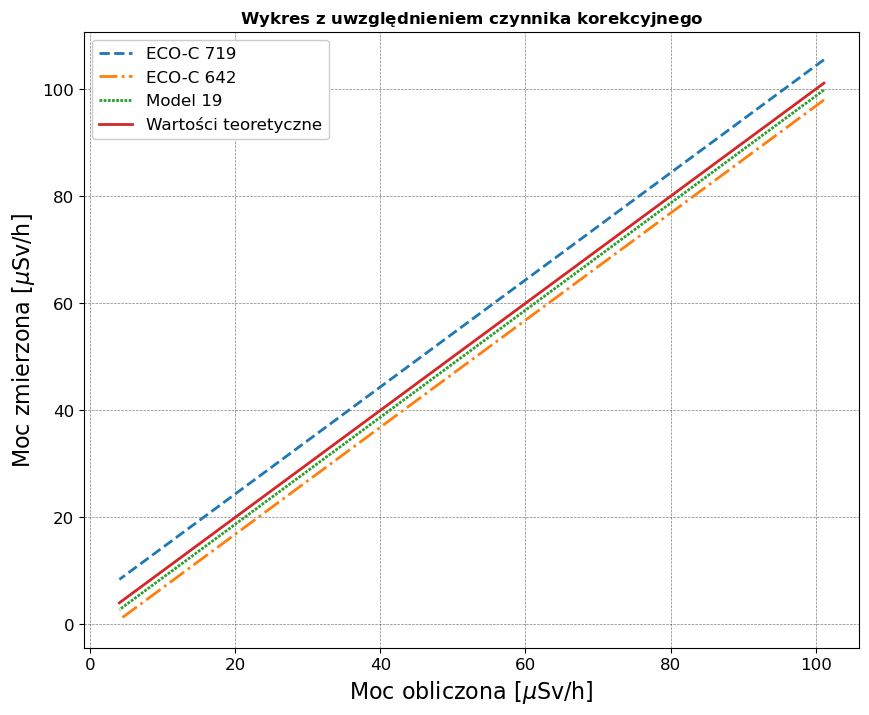

In [ ]:
plt.figure(1, (10, 8))
plt.plot(idealEffectiveDose, fit19.slope*idealEffectiveDose*idealityFactor[0] + fit19.intercept, linestyle = '--', linewidth = 2)
plt.plot(idealEffectiveDose, fit719.slope*idealEffectiveDose*idealityFactor[1] + fit719.intercept, linestyle = '-.', linewidth = 2)
plt.plot(idealEffectiveDose, fit642.slope*idealEffectiveDose*idealityFactor[2] + fit642.intercept, linestyle = (0, (1, 0.5)), linewidth = 2)
plt.plot(idealEffectiveDose, idealFit.slope*idealEffectiveDose + idealFit.intercept, linewidth = 2)

plt.title(r'$\bf{Wykres ~z ~uwzględnieniem ~czynnika ~korekcyjnego}$', fontsize = 14)
plt.xlabel(r'Moc obliczona [$\mu$Sv/h]', fontsize = 16)
plt.ylabel(r'Moc zmierzona [$\mu$Sv/h]', fontsize = 16)
plt.tick_params(axis='both', labelsize = 12)
plt.grid(True)
plt.legend(['ECO-C 719', 'ECO-C 642', 'Model 19', 'Wartości teoretyczne'], fontsize = 12)